In [5]:
import lcstack

lcstack.set_config_root("configs")
lcs = lcstack.LcStack.from_yaml(
    "workflow_simple_as_agent.yaml", env=True, secret=True, settings=True
)

wf = lcs.get("workflow_simple")

print(wf)
config = {"thread_id": "test_workflow_1"}
wf.invoke({"question": "tell me a joke about apple!"}, config=config)

first=RunnableLambda(_enter_graph) middle=[] last=<langgraph.graph.state.CompiledStateGraph object at 0x0000023B7CCB49E0>


{'question': 'tell me a joke about apple!',
 'not_used': 'this is a not used field',
 'response': "Sure, here's a light-hearted apple joke for you:\n\nWhy don't apples hurt the gardener?\n\nBecause they have a core of wisdom!",
 'branch__steps__': []}

#### Build a ReAct Agent with Workflow

In [3]:
import lcstack

lcstack.set_config_root("configs")
lcs = lcstack.LcStack.from_yaml(
    "workflow_react.yaml", env=True, secret=True, settings=True
)

In [4]:
llm_with_tools = lcs.get("llm_with_tools")
print(llm_with_tools)

llm_with_tools.invoke("Trump's recent news")

bound=ChatOllama(model='qwen2.5', temperature=0.3) kwargs={'tools': [{'type': 'function', 'function': {'name': 'tavily_search_results_json', 'description': 'A search engine optimized for comprehensive, accurate, and trusted results. Useful for when you need to answer questions about current events. Input should be a search query.', 'parameters': {'properties': {'query': {'description': 'search query to look up', 'type': 'string'}}, 'required': ['query'], 'type': 'object'}}}], 'tool_choice': None} config={} config_factories=[]


AIMessage(content='', additional_kwargs={}, response_metadata={'model': 'qwen2.5', 'created_at': '2024-09-26T12:11:39.6159739Z', 'message': {'role': 'assistant', 'content': '', 'tool_calls': [{'function': {'name': 'tavily_search_results_json', 'arguments': {'query': "Trump's recent news"}}}]}, 'done_reason': 'stop', 'done': True, 'total_duration': 22320108600, 'load_duration': 3276888700, 'prompt_eval_count': 191, 'prompt_eval_duration': 15274575000, 'eval_count': 27, 'eval_duration': 3760678000}, id='run-c9f147a6-46da-410e-8826-8fcc219b5c78-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': "Trump's recent news"}, 'id': 'ca3944ff-c9f0-489e-b684-27ab3b4944d0', 'type': 'tool_call'}], usage_metadata={'input_tokens': 191, 'output_tokens': 27, 'total_tokens': 218})

first=RunnableLambda(_enter_graph) middle=[] last=<langgraph.graph.state.CompiledStateGraph object at 0x00000172C964B230>


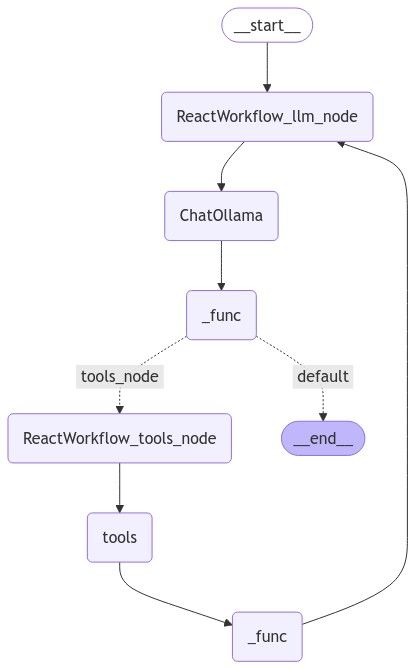

In [5]:
# langgraph graph image

from langgraph.graph.graph import CompiledGraph
from IPython.display import Image, display

workflow_react = lcs.get("workflow_react")
print(workflow_react)

lc_graph: CompiledGraph = workflow_react.last

try:
    display(Image(lc_graph.get_graph(xray=True).draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

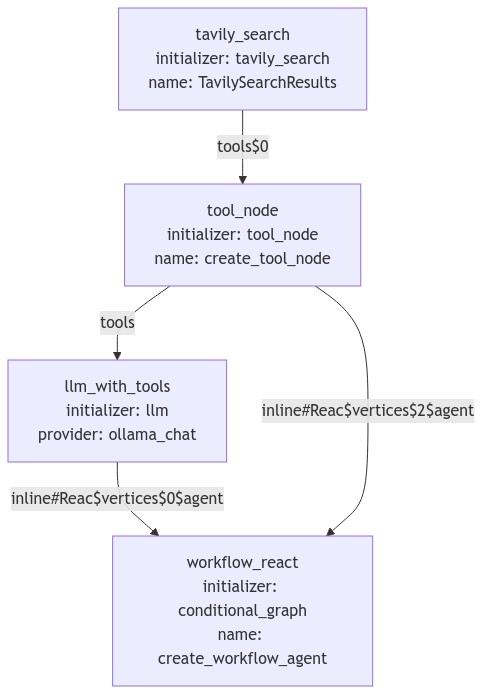

In [7]:
# show the configuration flow
from IPython.display import Image, display

display(Image(lcs.draw_graph_png()))

In [6]:
# from langchain_core.tracers.stdout import ConsoleCallbackHandler
from lcstack.components.tracers.console import ConsoleCallbackHandler

config = {
    "thread_id": "workflow_react_1",
    "callbacks": [ConsoleCallbackHandler(callbacks=["llm"])],
}  #
workflow_react.invoke(input={"query": "Trump's recent news"}, config=config)

2024-09-26 20:12:49,920 - langchain_core.tracers.core - WARNING - Parent run d84e635e-8df0-4c09-be94-59dec5e75054 not found for run b11e0d27-4c8a-4790-952c-05f3d10bd0de. Treating as a root run.


[llm/start] [llm:ChatOllama] Entering LLM run with input:
{
  "prompts": [
    "Human: Trump's recent news"
  ]
}


2024-09-26 20:12:53,918 - root - WARNING - output is a string or BaseMessage, expected a dict. Forcing it to be a dict.


[llm/end] [llm:ChatOllama] [4.00s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "",
        "generation_info": {
          "model": "qwen2.5",
          "created_at": "2024-09-26T12:12:53.915259Z",
          "message": {
            "role": "assistant",
            "content": "",
            "tool_calls": [
              {
                "function": {
                  "name": "tavily_search_results_json",
                  "arguments": {
                    "query": "Trump's recent news"
                  }
                }
              }
            ]
          },
          "done_reason": "stop",
          "done": true,
          "total_duration": 3991331800,
          "load_duration": 21669000,
          "prompt_eval_count": 191,
          "prompt_eval_duration": 174382000,
          "eval_count": 27,
          "eval_duration": 3791174000
        },
        "type": "ChatGeneration",
        "message": {
          "lc": 1,
          "type": "cons

2024-09-26 20:12:57,550 - langchain_core.tracers.core - WARNING - Parent run 73845586-b645-4b2a-a6e7-3548cc4dba74 not found for run ec27bf8e-80e0-41d7-95a9-ba52aa57cf3d. Treating as a root run.


[llm/start] [llm:ChatOllama] Entering LLM run with input:
{
  "prompts": [
    "Human: Trump's recent news\nAI: \nTool: [{\"url\": \"https://www.nbcnews.com/politics/donald-trump/trump-campaign-says-former-president-safe-possible-gunshots-vicinity-rcna171206\", \"content\": \"Trump safe after shots fired in his vicinity at golf course; FBI investigating apparent assassination attempt NBC OUT NBC News Now More From NBC Follow NBC News One person is in custody after shots were fired Sunday in what the FBI is calling an apparent second \\\"attempted assassination\\\" of former President Donald Trump at his golf course in West Palm Beach, Florida. A senior law enforcement official briefed on the incident told NBC News that Trump was on the golf course when what sounded like gunfire was heard in the near distance. Alexandra Marquez is a politics reporter for NBC News. Jonathan Dienst is chief justice contributor for NBC News and chief investigative reporter for WNBC-TV in New York.\"}, {\"u

2024-09-26 20:15:51,686 - root - WARNING - output is a string or BaseMessage, expected a dict. Forcing it to be a dict.


[llm/end] [llm:ChatOllama] [174.14s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "Here are some recent news updates about Donald Trump:\n\n1. **Trump Safe After Shots Fired in His Vicinity at Golf Course; FBI Investigating Apparent Assassination Attempt**\n   - [Read more](https://www.nbcnews.com/politics/donald-trump/trump-campaign-says-former-president-safe-possible-gunshots-vicinity-rcna171206)\n   - A person is in custody after shots were fired near Trump at his golf course. The FBI is investigating this as an apparent assassination attempt.\n\n2. **Trump Celebrates Win in Colorado Election Case During Return Visit to Iowa**\n   - [Read more](https://apnews.com/hub/donald-trump)\n   - Trump celebrated a win in a Colorado election case during a visit to Iowa, casting himself as the protector of women's rights by saying they won't be thinking about abortion if he is elected.\n\n3. **Live Updates: Secret Service Under Pressure After Second Apparent 

{'messages': [HumanMessage(content="Trump's recent news", additional_kwargs={}, response_metadata={}, name='input'),
  AIMessage(content='', additional_kwargs={}, response_metadata={'model': 'qwen2.5', 'created_at': '2024-09-26T12:12:53.915259Z', 'message': {'role': 'assistant', 'content': '', 'tool_calls': [{'function': {'name': 'tavily_search_results_json', 'arguments': {'query': "Trump's recent news"}}}]}, 'done_reason': 'stop', 'done': True, 'total_duration': 3991331800, 'load_duration': 21669000, 'prompt_eval_count': 191, 'prompt_eval_duration': 174382000, 'eval_count': 27, 'eval_duration': 3791174000}, id='run-b11e0d27-4c8a-4790-952c-05f3d10bd0de-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': "Trump's recent news"}, 'id': 'd30d6367-34df-45a1-bd85-6d6cf7cd05d4', 'type': 'tool_call'}], usage_metadata={'input_tokens': 191, 'output_tokens': 27, 'total_tokens': 218}),
  ToolMessage(content='[{"url": "https://www.nbcnews.com/politics/donald-trump/trump-campaig